# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

In [454]:
# Boolean for clean-up phase to delete any closed or archived restaurants. Set to True to leave all records.
DO_NOT_DELETE_RECORDS = True

### Let us start by importing the required libraries

In [455]:
# Import data manipulation libraries.
import numpy as np
import pandas as pd

# Import data visualization libraries.
import matplotlib.pyplot as plt
import seaborn as sns

# Gets rid of FutureWarning warnings when generating some Seaborn visualizations.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Display the graphs inside of the notebook.
%matplotlib inline

# Restrict float values to 2 decimal places.
pd.set_option('display.float_format', lambda x: '%.2f' % x)



### Understanding the structure of the data

In [456]:
# Import the Google Colab libraries and mount Google Drive.
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [457]:
# Read the CSV data.
df = pd.read_csv('/content/drive/MyDrive/colab-notebooks/foodhub-project/data/foodhub_order.csv')
# Show the first five rows.
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

* The 9 columns correspond to those mentioned in the Data Dictionary.
  * Data Dictionary has a column named "cost", however, the CSV file  names this "cost_of_the_order". We will not alias for this notebook, but it might need to be clarified with the business how they want this to look on the final report.
* Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [458]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
* There are 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [459]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

* There is one float column (cost_of_the_order)
* There are four integer columns (order_id, customer_id, food_preparation_time, delivery_time)
* There are four string columns (restaurant_name, cuisine_type, day_of_the_week, rating)
* **Rating** is stored as a string with the value of "Not given" representing NaN. In order to aggregate rating, this will need to be cast as an integer and "Not given" assigned to NaN.

Data types are as follows:

Column | Data Type |
-------|-----------|
order_id | int64 |
customer_id | int64 |
restaurant_name | object |
cuisine_type | object |
cost_of_the_order | float64 |
day_of_the_week | object |
**rating** | **object** |
food_preparation_time | int64 |
delivery_time | int64 |

int64 = integer
<br/>object = string
<br/>float64 = decimal

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [460]:
# Look through all the columns to get the unique values.
for col in df.columns:
  print(f'{col}: ', df[col].unique())

order_id:  [1477147 1477685 1477070 ... 1477819 1477513 1478056]
customer_id:  [337525 358141  66393 ...  97838 292602 397537]
restaurant_name:  ['Hangawi' 'Blue Ribbon Sushi Izakaya' 'Cafe Habana'
 'Blue Ribbon Fried Chicken' 'Dirty Bird to Go' 'Tamarind TriBeCa'
 'The Meatball Shop' 'Barbounia' 'Anjappar Chettinad' 'Bukhara Grill'
 'Big Wong Restaurant \x8c_¤¾Ñ¼' 'Empanada Mama (closed)' 'Pylos'
 "Lucky's Famous Burgers" 'Shake Shack' 'Sushi of Gari' 'RedFarm Hudson'
 'Blue Ribbon Sushi' 'Five Guys Burgers and Fries' 'Tortaria'
 'Cafe Mogador' 'Otto Enoteca Pizzeria' 'Vezzo Thin Crust Pizza'
 'Sushi of Gari 46' 'The Kati Roll Company' 'Klong' '5 Napkin Burger'
 'TAO' 'Parm' 'Sushi Samba' 'Haru Gramercy Park'
 'Chipotle Mexican Grill $1.99 Delivery' 'RedFarm Broadway' 'Cafeteria'
 'DuMont Burger' "Sarabeth's East" 'Hill Country Fried Chicken' 'Bistango'
 "Jack's Wife Freda" "Mamoun's Falafel" 'Prosperity Dumpling'
 'Blue Ribbon Sushi Bar & Grill' 'Westville Hudson' 'Blue Ribbon Brookl

In [461]:
# Count numeric and non-numeric data.
df['rating'].apply(type).value_counts()

<class 'str'>    1898
Name: rating, dtype: int64

In [462]:
# We were expecting string and numeric data types, but the rating columns was all string values.
# We can see by checking the unique values for the rating column that there are integers stored as string.
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [463]:
# Write your code here
# Cast rating column to an integer and ascribe NaN to the value of "Not given"
df['rating'] = df['rating'].replace(['Not given'], np.nan)
df['rating'] = df['rating'].astype(float)

# Optional 'one-liner'.
# If there were additional string values the more explicit method might be better.
#df['rating'] = pd.to_numeric(df['rating'], 'coerce')

In [464]:
# Array now contains NaN value.
df['rating'].unique()

array([nan,  5.,  3.,  4.])

In [465]:
# You can see that there are 1162 non-null values meaning that there are 736 NaN values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


#### Observations:

* Rating is stored as a string with the value "Not given" representing customers which did not rate the restaurant.
  * Cast "Not given" to numeric and set "Not given" values to NaN. This will allow them to be be filtered out in aggregation operations such as AVERAGE rating.
  * Rating now has 736 NaN values and 1162 non-null values.
* Dirty Data
  * There are some restaurant name which should be cleaned up such as 'Joe's Shanghai \x8e_À\x8eü£¾÷´'
  * There are restaurants marked with (closed) or (archived) which should be excluded from some analysis.


### Clean up data

In [466]:
# Clean up dirty data.
bad_names = ['Big Wong Restaurant \x8c_¤¾Ñ¼', 'Chipotle Mexican Grill $1.99 Delivery', "Joe's Shanghai \x8e_À\x8eü£¾÷´"]
good_names = ['Big Wong Restaurant', 'Chipotle Mexican Grill', "Joe's Shanghai"]

for n, name in enumerate(bad_names):
  index_value = df[df['restaurant_name'] == name].index

  for iv in index_value:
    df.loc[iv,'restaurant_name'] = good_names[n]

# Verify there are no ugly characters.
result = df[df['restaurant_name'].isin(bad_names)]

assert len(result) == 0, "Rename was unsuccsessful"


In [467]:
if DO_NOT_DELETE_RECORDS == False:
  del_cond = ['Empanada Mama (closed)', 'Dirty Bird To Go (archived)']

  for item in del_cond:
    df.drop(df[df['restaurant_name'] == item].index, inplace=True)

  # Test after delete. Value should be zero. Will return an assertion error if any rows remain in delete condition.
  result = df[df['restaurant_name'].isin(del_cond)]

  assert len(result) == 0, "Delete was unsuccsessful"

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [468]:
# Write your code here
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.00,NaN,NaN,NaN,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,NaN,NaN,NaN,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.00,NaN,NaN,NaN,16.50,7.48,4.47,12.08,14.14,22.30,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1162.00,NaN,NaN,NaN,4.34,0.74,3.00,4.00,5.00,5.00,5.00
food_preparation_time,1898.00,NaN,NaN,NaN,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,NaN,NaN,NaN,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:
* With **rating** cast as numeric we can see aggregates such as the mean of 4.34 for the entire data set.


### **Question 5:** How many orders are not rated? [1 mark]

In [469]:
# Write the code here
# Get the count of non-rated (NaN) orders.
df['rating'].isnull().sum()

736

#### Observations:
* There are 736 orders which have not been rated.
  * If DO_NOT_DELETE_RECORDS is set to False then the value will be 730.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### order_id

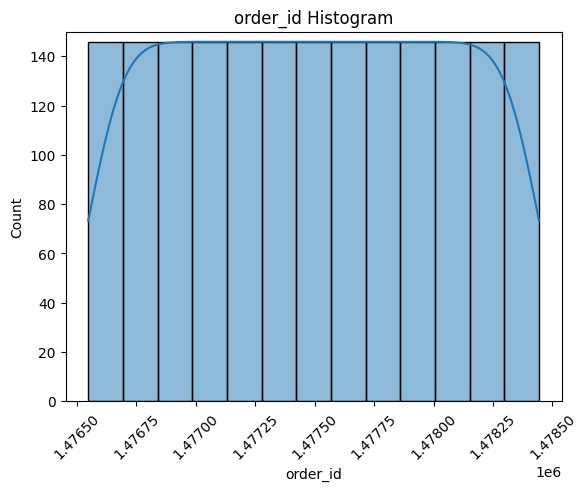

In [470]:
plt.ylim(0,150)
plt.xticks(rotation=45)
plt.title('order_id Histogram')

sns.histplot(data=df, x='order_id',kde=True);

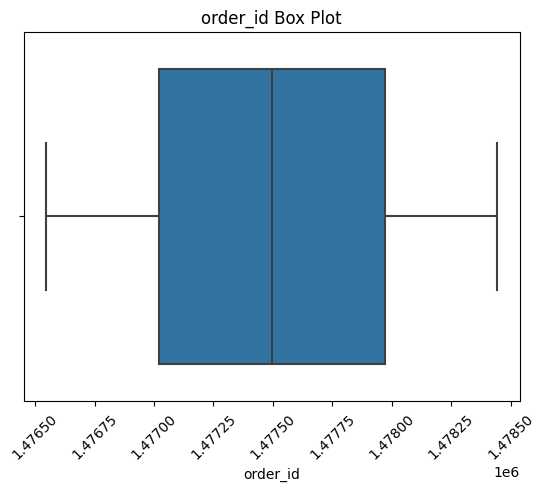

In [471]:
plt.title('order_id Box Plot')
plt.xticks(rotation=45)
sns.boxplot(data=df,x='order_id').set(title='order_id Box Plot');

##### Observations
* order_id is normally distributed which makes sense because it is unique.
* Data is not skewed left or right.
* There are no outliers.

#### customer_id

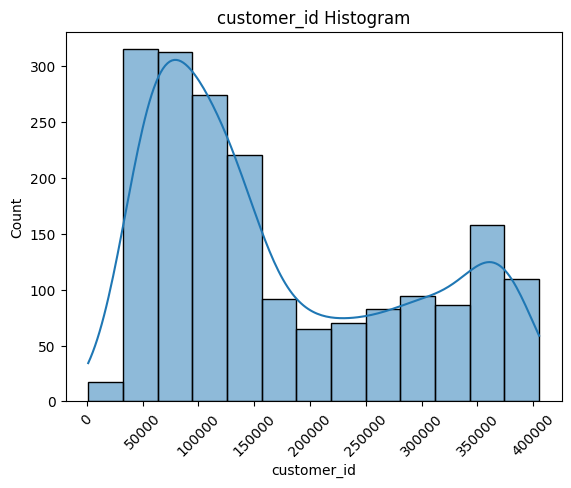

In [472]:
plt.xticks(rotation=45)
plt.title('customer_id Histogram')

sns.histplot(data=df, x='customer_id', kde=True);

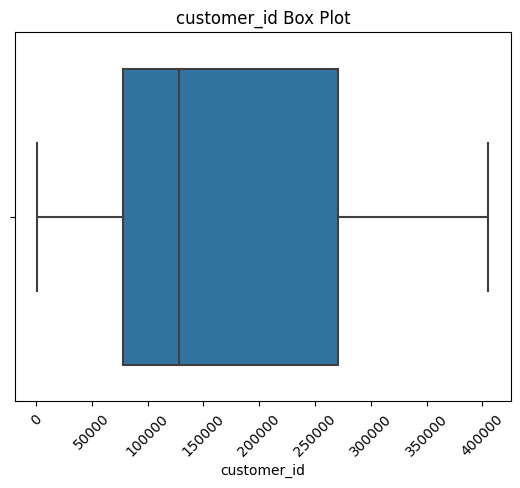

In [473]:
plt.title('customer_id Box Plot')
plt.xticks(rotation=45)
sns.boxplot(data=df,x='customer_id');

##### Observations
* customer_id has a very slight bimodal distribution.
* The data skews slightly to the right.
* There are no outliers.

#### restaurant_name

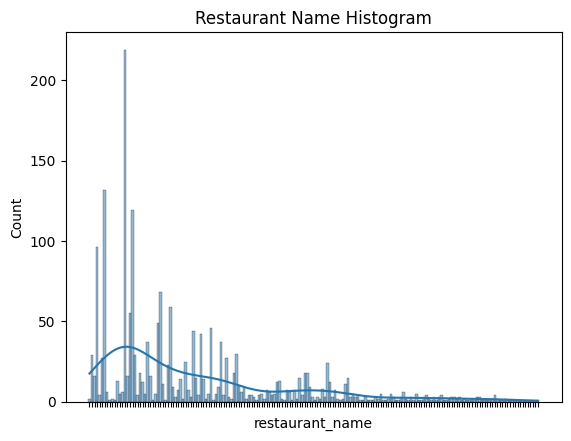

In [474]:
plt.xticks(rotation=45)
plt.title('Restaurant Name Histogram')

sns.histplot(data=df, x='restaurant_name', kde=True).set(xticklabels=[]);

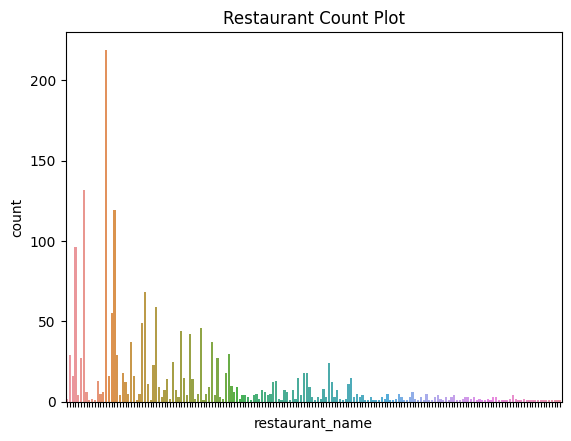

In [475]:
plt.xticks(rotation=90)
#plt.figure(figsize=(100,20))
plt.title('Restaurant Count Plot')

sns.countplot(data=df, x='restaurant_name').set(xticklabels=[]);
#sns.countplot(data=df[df['restaurant_name'].map(df['restaurant_name'].value_counts()) > 10], x='restaurant_name');

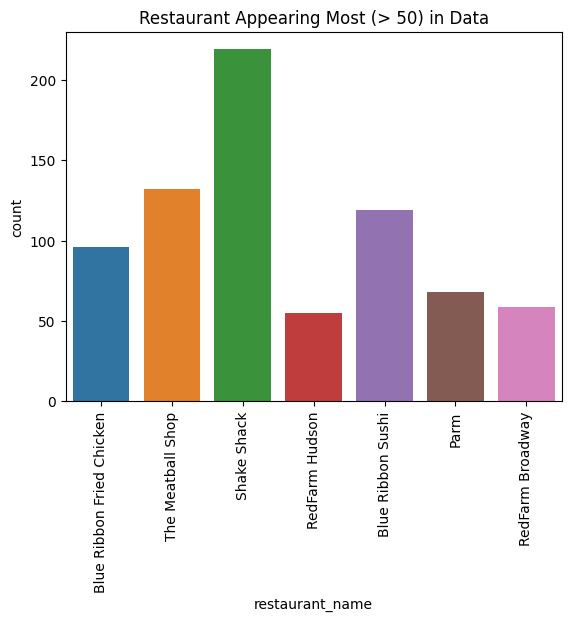

In [476]:
# Retaurants appearing most
plt.xticks(rotation=90)
plt.title('Restaurant Appearing Most (> 50) in Data')

sns.countplot(data=df[df['restaurant_name'].map(df['restaurant_name'].value_counts()) > 50], x='restaurant_name');

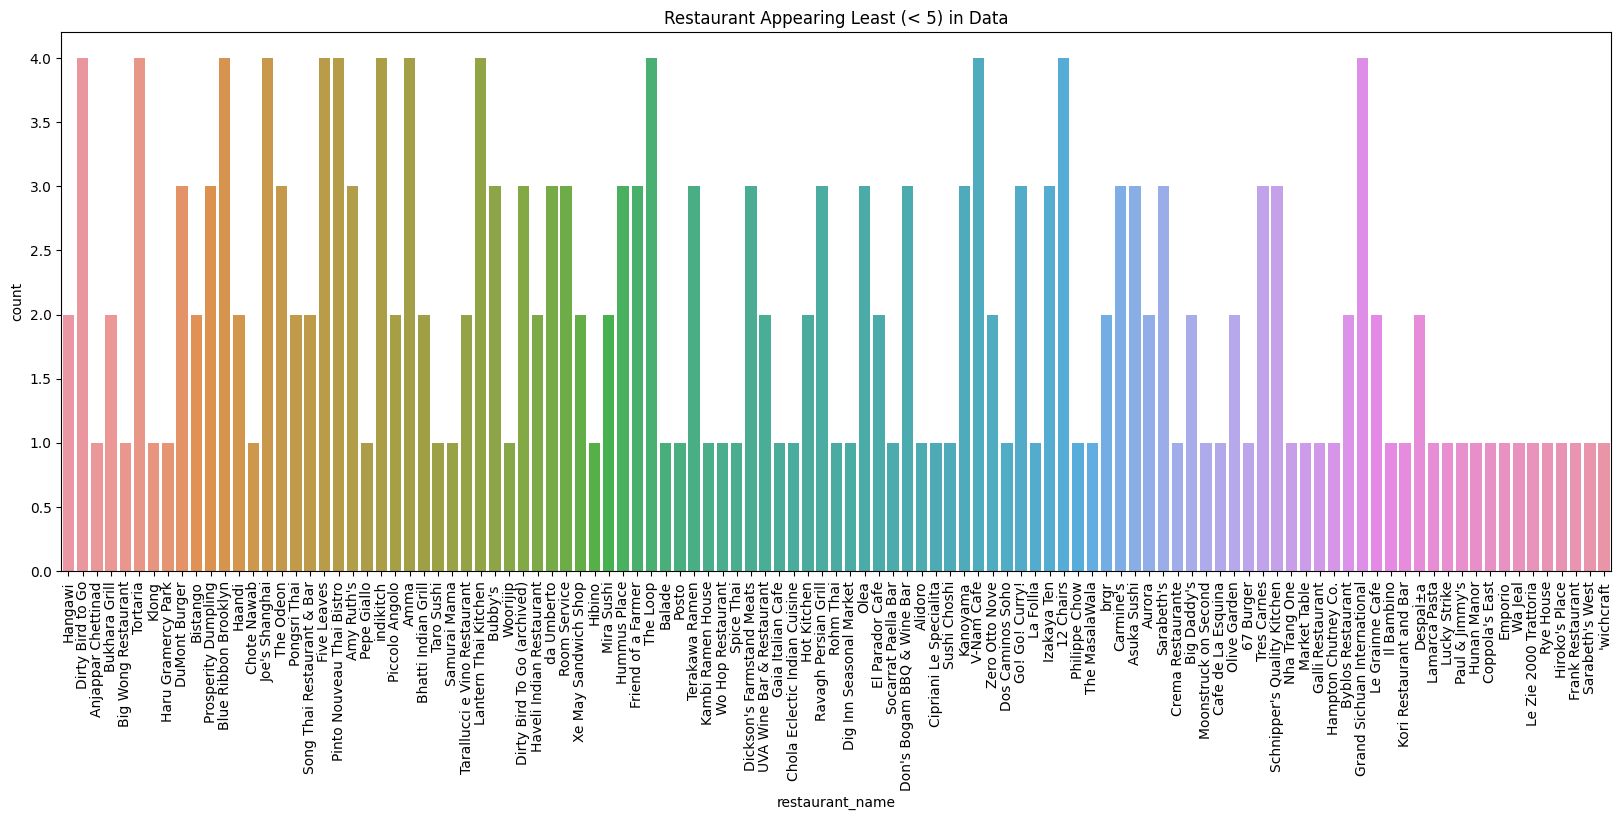

In [477]:
# Retaurants appearing most
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)

plt.title('Restaurant Appearing Least (< 5) in Data')

sns.countplot(data=df[df['restaurant_name'].map(df['restaurant_name'].value_counts()) < 5], x='restaurant_name');

##### Observations
* Data is multimodal and it appears that most restaurants only appear a few times in the data with only a few restaurants appearing a lot. These restaurant are most likely those which are doing the right things to attract customers.

#### cuisine_type

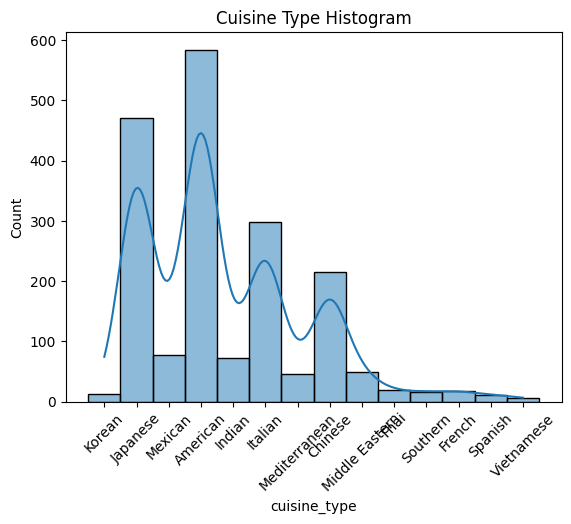

In [478]:
plt.xticks(rotation=45)
plt.title('Cuisine Type Histogram')

sns.histplot(data=df, x='cuisine_type', kde=True);

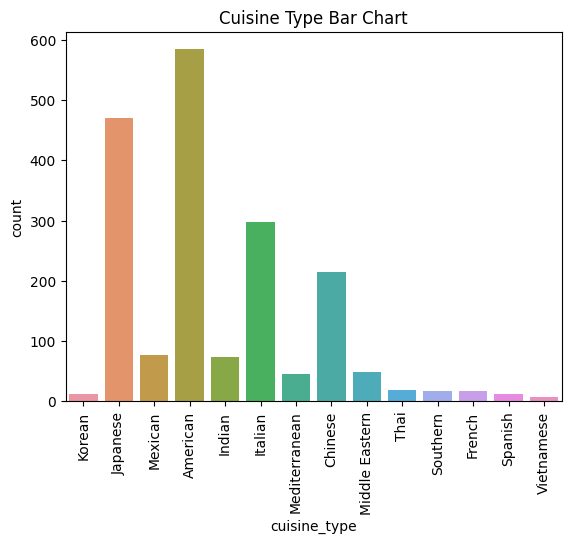

In [479]:
# Retaurants appearing most
plt.xticks(rotation=90)
plt.title('Cuisine Type Bar Chart')

sns.countplot(data=df, x='cuisine_type');

##### Observations
* Data is multimodal and the most popular cuisine types are American, Japanese, Italian and Chinese.

#### cost_of_the_order

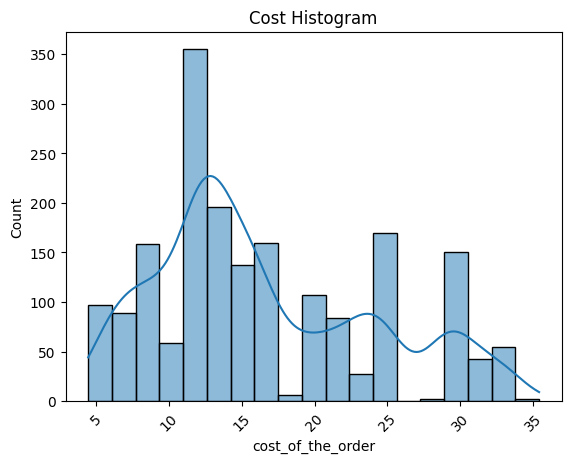

In [480]:
plt.xticks(rotation=45)
plt.title('Cost Histogram')

sns.histplot(data=df, x='cost_of_the_order', kde=True);

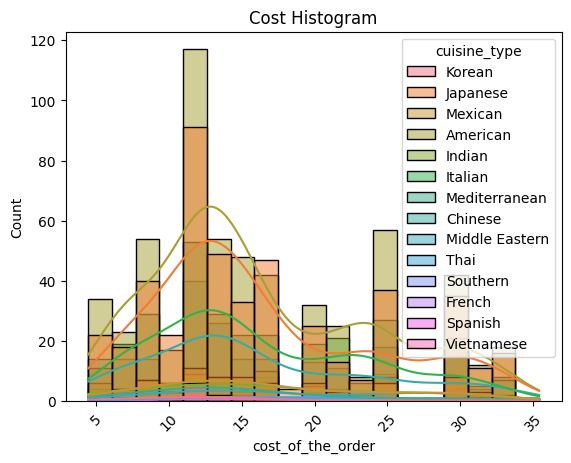

In [481]:
plt.xticks(rotation=45)
plt.title('Cost Histogram')

sns.histplot(data=df, x='cost_of_the_order',hue='cuisine_type', kde=True);

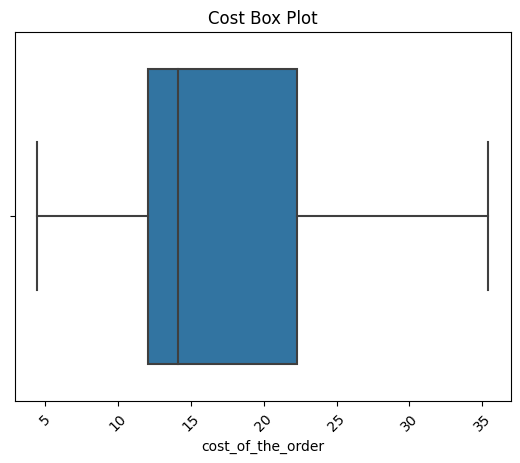

In [482]:
plt.title('Cost Box Plot')
plt.xticks(rotation=45)
sns.boxplot(data=df,x='cost_of_the_order');

##### Observations
* Cost skews to the right with most of the orders falling between 10 and 15 dollars.
* Of those orders, most are American food, followed by Japanese and then Italian.
* No outliers.

#### day_of_the_week

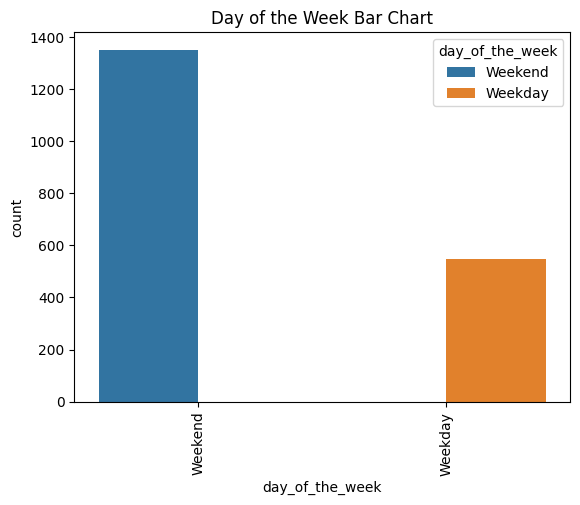

In [483]:
plt.xticks(rotation=90)
plt.title('Day of the Week Bar Chart')

sns.countplot(data=df, x='day_of_the_week', hue='day_of_the_week');

##### Observations
* Only two values here which are weekend and weekday.
* Weekend days provides the most buisness.
* **Would look into breaking this down further by an actual calendar date.**

#### rating

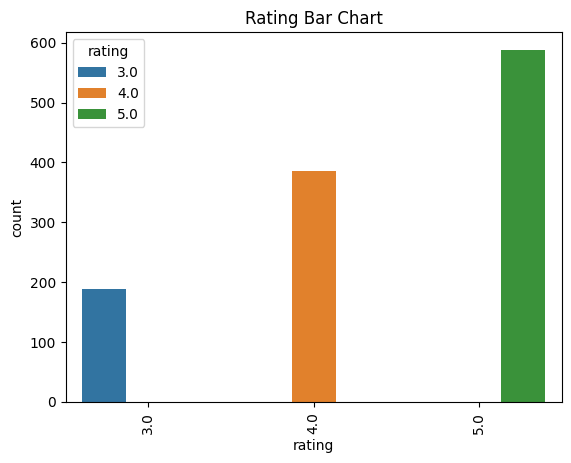

In [484]:
plt.xticks(rotation=90)
plt.title('Rating Bar Chart')

sns.countplot(data=df, x='rating', hue='rating');

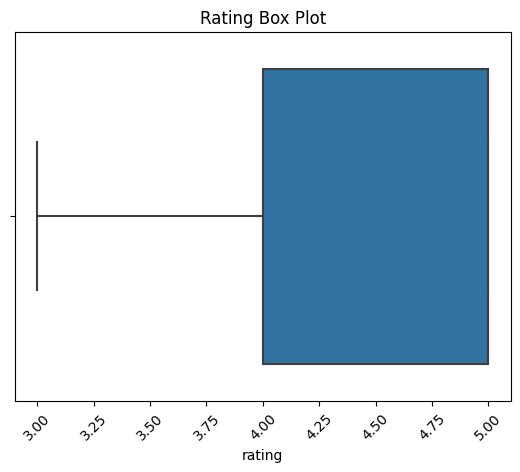

In [485]:
plt.title('Rating Box Plot')
plt.xticks(rotation=45)
sns.boxplot(data=df,x='rating');

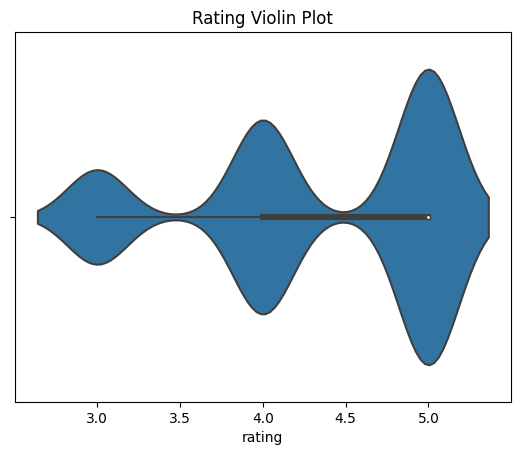

In [486]:
plt.title('Rating Violin Plot')

sns.violinplot(data=df, x='rating');

##### Observations
* Most ratings are 5-star.
* 1 and 2-star ratings are missing. This would mean that a rating of 3 would represent the worst rating possible at this time.
* NaN values do not appear.
* No outliers.

#### food_preparation_time

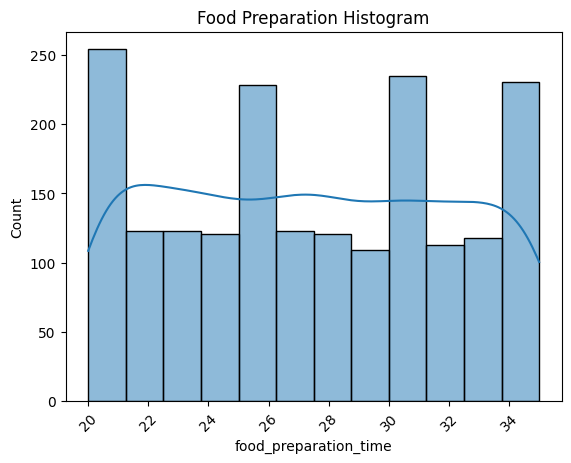

In [487]:
plt.xticks(rotation=45)
plt.title('Food Preparation Histogram')

sns.histplot(data=df, x='food_preparation_time', kde=True);

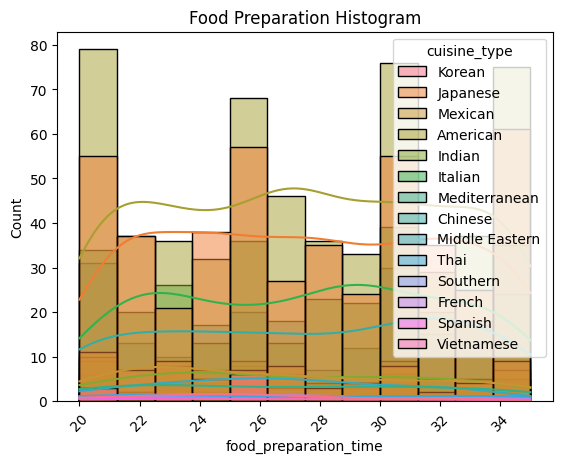

In [488]:
plt.xticks(rotation=45)
plt.title('Food Preparation Histogram')
sns.histplot(data=df, x='food_preparation_time',hue='cuisine_type', kde=True);

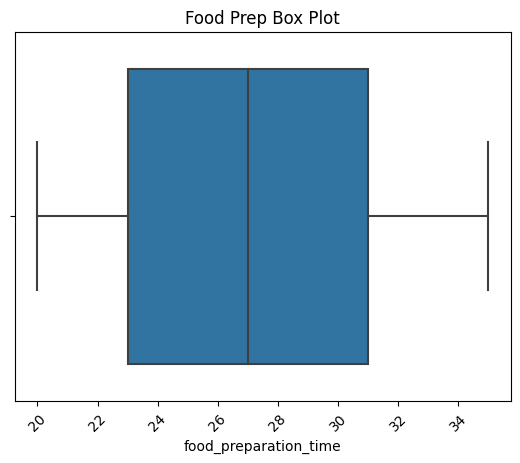

In [489]:
plt.title('Food Prep Box Plot')
plt.xticks(rotation=45)
sns.boxplot(data=df,x='food_preparation_time');

##### Observations
* Distribution is normal. Which isn't great because you would want most orders to take the least amount of time.
* No outliers.



#### delivery_time

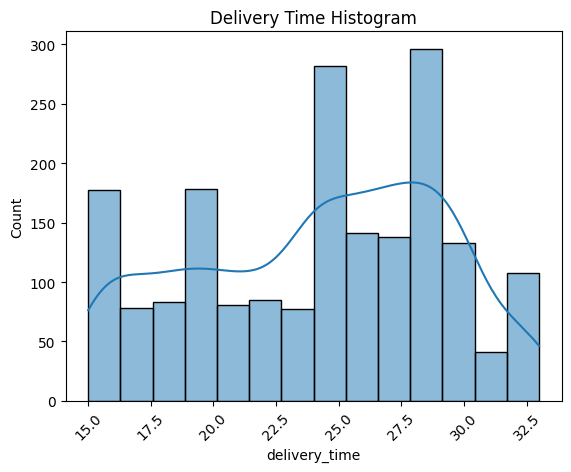

In [490]:
plt.xticks(rotation=45)
plt.title('Delivery Time Histogram')

sns.histplot(data=df, x='delivery_time', kde=True);

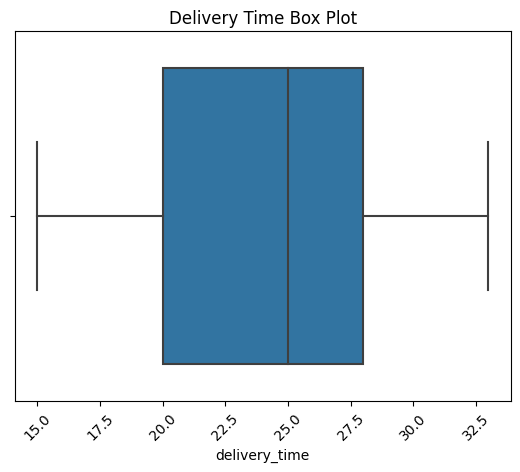

In [491]:
plt.title('Delivery Time Box Plot')
plt.xticks(rotation=45)
sns.boxplot(data=df,x='delivery_time');

##### Observations
* Distribution skewed left as most orders deliver in 25 to 30 minutes.
* No outliers.

#### Final Univariate Observations:
* There are no outliers in any of the data.
* Food preparation time is a normal distribution, but probably should be more right skewed meaning orders are being prepared faster.
* A few restaurants appear to be doing very well while a lot of restaurants have less than five entries in the data.
* Most popular cuisine types are American, Japanese, Italian and Chinese.
* Most activity appears to happen on the weekends.
* Most ratings are 5-star, but there are no 1 or 2 star ratings for any restaurant.
* Delivery time is between 25 and 30 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [492]:
# Write the code here
df_count = df.groupby(['restaurant_name'])['order_id'].count()
print(df_count.reset_index()
              .sort_values(['order_id'],ascending = False)
              .set_index(['restaurant_name']).head(5))

                           order_id
restaurant_name                    
Shake Shack                     219
The Meatball Shop               132
Blue Ribbon Sushi               119
Blue Ribbon Fried Chicken        96
Parm                             68


#### Observations:
* Top 5 restaurants are:
  * Shake Shack
  * The Meatball Shop
  * Blue Ribbon Sushi
  * Blue Ribbon Fried Chicken
  * Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [493]:
# Write the code here
# Get most popular cuisine on weekends
weekend_df = df[df['day_of_the_week'] == 'Weekend']
weekend_df['cuisine_type'].value_counts().head(5)

American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64

#### Observations:
* On the weekend, American food is the most popular with 415 total orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [494]:
# Write the code here
# Get all orders over 20 dollars.
orders_over20 = df[df['cost_of_the_order']>20]
# Compare orders over 20 with total orders to get the percentage.
percent_over20 = round((len(orders_over20) / len(df)) * 100, 2) # Only two decimal places
print(f"The percentage of order over 20 is {percent_over20}")

The percentage of order over 20 is 29.24


#### Observations:
* The percentage of orders over 20 dollars is 29.24%.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [495]:
# Write the code here
mean_delivery = round(df['delivery_time'].mean(), 2) # Only two decimal places
print(f"The mean delivery time is {mean_delivery} minutes.")

The mean delivery time is 24.16 minutes.


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [496]:
# Write the code here
top_customers = df['customer_id'].value_counts().head(3)

print("The customers which will recieve the 20% discount voucher are: \n")
for i, num in enumerate(top_customers.index):
  print(f"Customer ID: {top_customers.index[i]}")
  print(f"Number of Total Orders: {top_customers[num]}")
  print('\n')

The customers which will recieve the 20% discount voucher are: 

Customer ID: 52832
Number of Total Orders: 13


Customer ID: 47440
Number of Total Orders: 10


Customer ID: 83287
Number of Total Orders: 9




#### Observations:
* Customers with the following ids will receive the 20% discount:
  * 52832
  * 47440
  * 83287

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### General Heatmap of all numeric variables.

<Axes: >

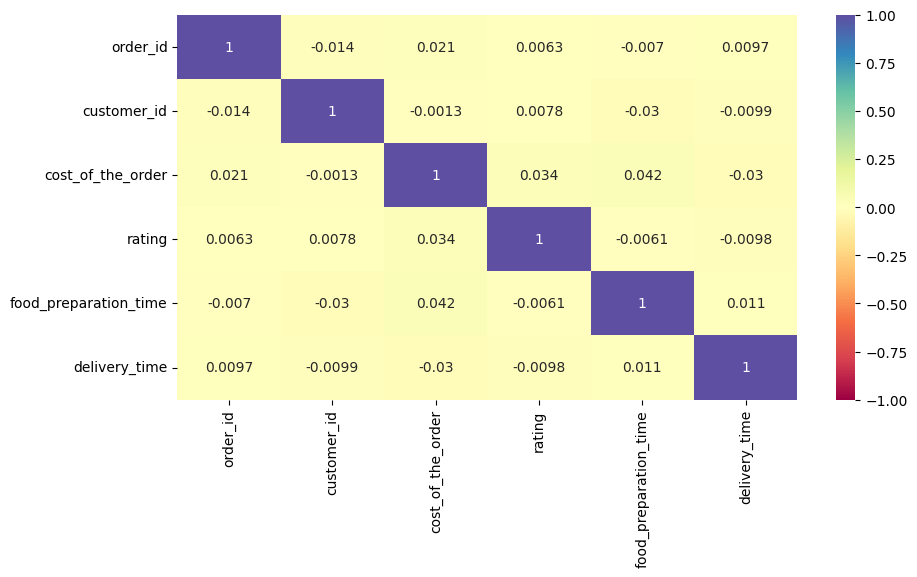

In [497]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)

##### Observations:
* No obvious correlation in the data between any of the numeric variables which is surprising. I would have expected there to be a larger correlation between delivery time and rating for example. Perhaps the sample size is too small.

#### General Pair Plot for imporant variables sliced by day of the week.

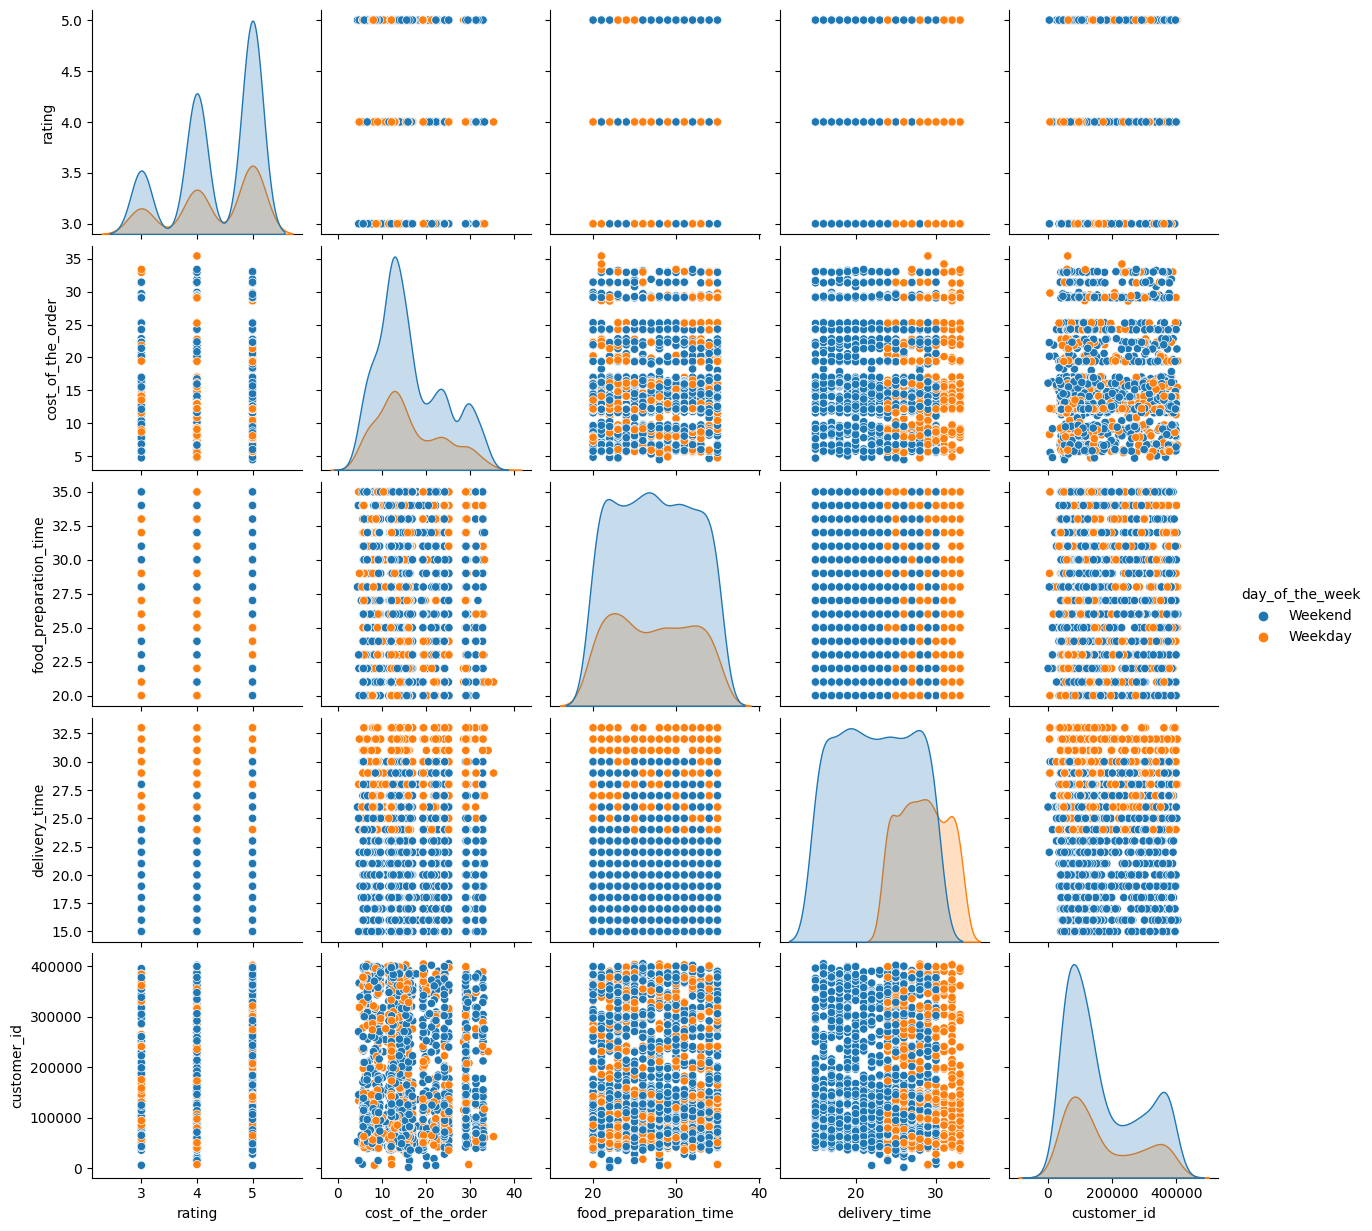

In [498]:
sns.pairplot(data=df, vars= ['rating','cost_of_the_order','food_preparation_time', 'delivery_time', 'customer_id'],hue='day_of_the_week', corner = False);

##### Observations:
* When day of the week is added you can see a littel more detail.
  * If you look at food_preparation_time and delivery_time the food preparation time stay consistent, but you can see delivery times are longer on a weekday.
  * If you look at rating and delivery_time you can see on weekdays in particular, if the delivery time is longer the ratings are lower.

**Based on this I would look at food preparation time and delivery time as it appears to affect rating and customer satisfaction.**

#### delivery_time

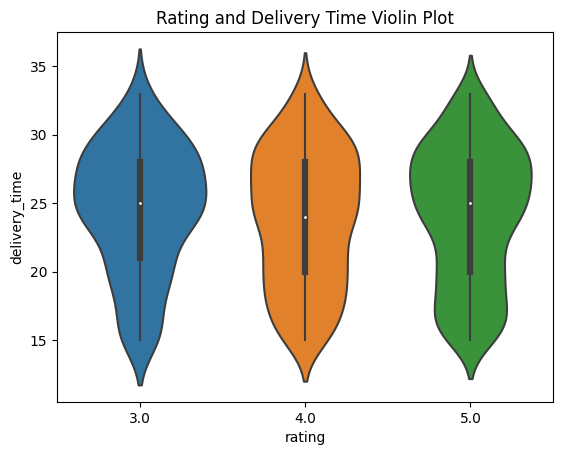

In [499]:
plt.title('Rating and Delivery Time Violin Plot')
#plt.figure(figsize = (20,7))
sns.violinplot(data=df, x='rating',y='delivery_time');

##### Observations:
* Delivery time does not have as much as an effect on rating as one would suppose. There may be other factors.

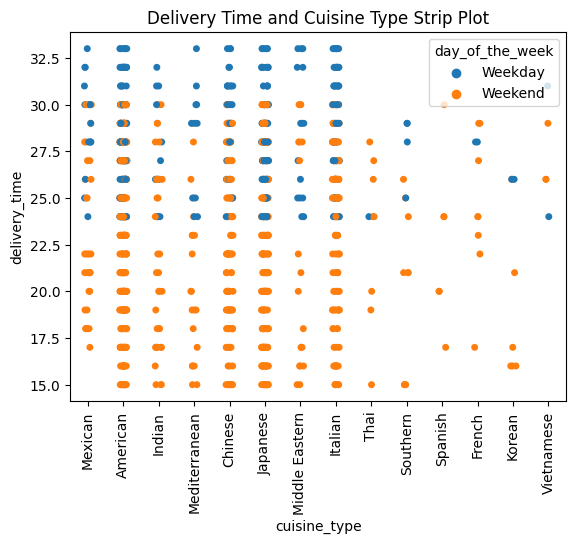

In [500]:
#plt.figure(figsize = (20,10))
plt.title('Delivery Time and Cuisine Type Strip Plot')
plt.xticks(rotation=90)
nonnull_df = df[df['rating'].notna()]
sns.stripplot(data=nonnull_df, x='cuisine_type',y='delivery_time',hue='day_of_the_week');

##### Observations:
* On the weekday the earliest delivery time is about 23 minutes.
* On the weekend the earliest delivery time is 15 minutes.

**The weekend has more overall orders, but it performs better in delivery times.**

#### food_preparation_time

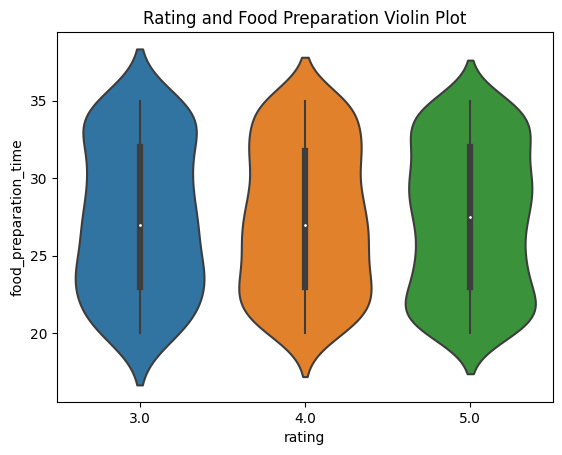

In [501]:
plt.title('Rating and Food Preparation Violin Plot')
#plt.figure(figsize = (20,7))
sns.violinplot(data=df, x='rating',y='food_preparation_time');

##### Observations:
* No clear pattern show on rating based on food preparation time. There may be a little bump at the 5-star level if you can get food prep to around 20-minutes.

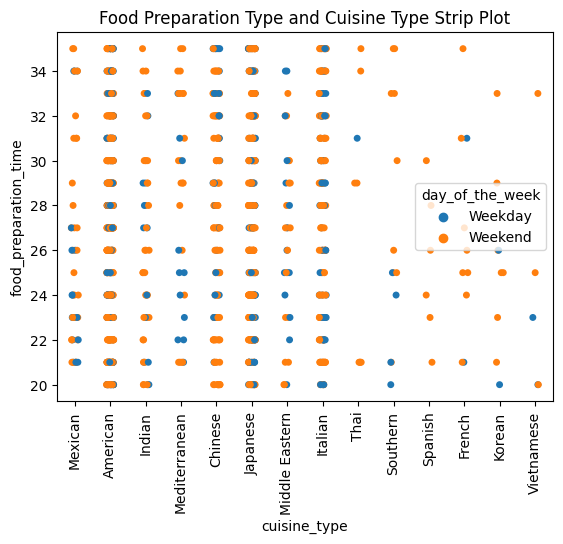

In [502]:
#plt.figure(figsize = (20,10))
plt.title('Food Preparation Type and Cuisine Type Strip Plot')
plt.xticks(rotation=90)
nonnull_df = df[df['rating'].notna()]
sns.stripplot(data=nonnull_df, x='cuisine_type',y='food_preparation_time',hue='day_of_the_week');

##### Observations:
* Food preparation times appear more consistent through the entire week.

#### cost_of_the_order

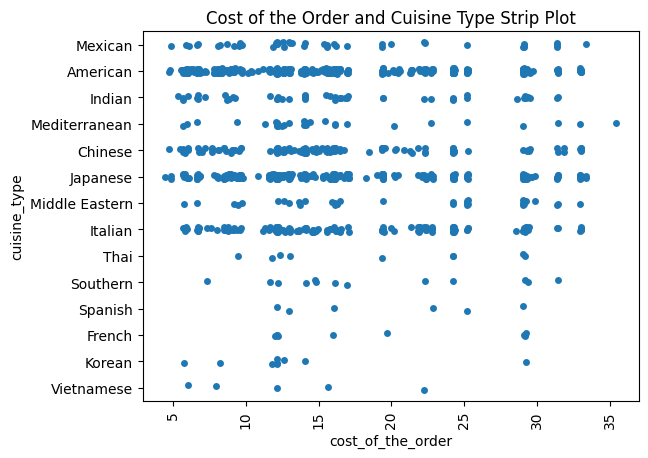

In [503]:
#plt.figure(figsize = (20,10))
plt.title('Cost of the Order and Cuisine Type Strip Plot')
plt.xticks(rotation=90)
sns.stripplot(data=nonnull_df, x='cost_of_the_order',y='cuisine_type');

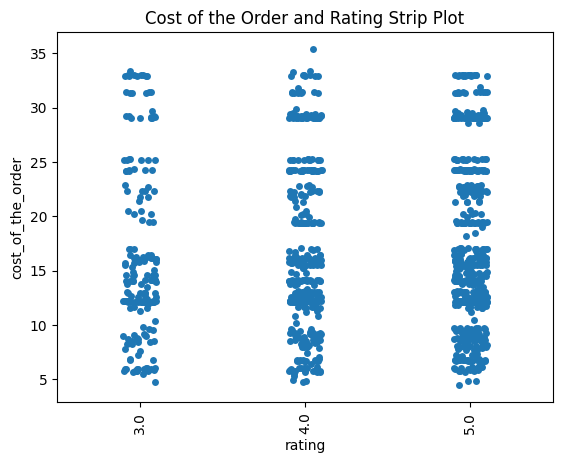

In [504]:
#plt.figure(figsize = (20,10))
plt.title('Cost of the Order and Rating Strip Plot')
plt.xticks(rotation=90)
sns.stripplot(data=nonnull_df, x='rating',y='cost_of_the_order');

##### Observations
* Most people order meals which are under about 17 dollars.
* Cost of the order does not appear to affect rating.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [505]:
agg_df = df.groupby('restaurant_name').agg({'rating': ['count','mean']}).reset_index()
agg_df.columns = ['restaurant_name', 'rating_count', 'rating_average']

promo_restaurants_df = agg_df[(agg_df['rating_count'] > 50) &
                              (agg_df['rating_average'] > 4.0 )]

print(promo_restaurants_df)


               restaurant_name  rating_count  rating_average
20   Blue Ribbon Fried Chicken            64            4.33
21           Blue Ribbon Sushi            73            4.22
136                Shake Shack           133            4.28
153          The Meatball Shop            84            4.51


#### Observations:
* Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack and The Meatball Shop would qualify for the promotion.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [506]:
df['net_revenue'] = (
    df['cost_of_the_order'] * 0.75 * (df['cost_of_the_order'] > 20) +  # 25% charge
    df['cost_of_the_order'] * 0.85 * ((df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)) +  # 15% charge
    df['cost_of_the_order'] * (df['cost_of_the_order'] <= 5)  # No charge if cost <= 5
)

# Total net revenue generated by the company across all orders
total_net_revenue = df['net_revenue'].sum()

print("Total net revenue generated by the company: ${:,.2f}".format(total_net_revenue))

Total net revenue generated by the company: $25,148.52


#### Observations:
* Total net revenue generate by the company based on these conditions is $25,148.52.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [507]:
# Calculate total time for each order (food preparation + delivery)
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate percentage of orders taking more than 60 minutes
orders_exceeding_60 = df[df['total_delivery_time'] > 60]
percentage_orders_exceeding_60 = (len(orders_exceeding_60) / len(df)) * 100

print(f"Percentage of orders taking more than 60 minutes: {percentage_orders_exceeding_60:.2f}%")


Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:
* The percentage of orders taking greater than 60 minues is 10.54%.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

> Indented block



In [508]:
# Grouping data by 'day_of_the_week' and calculating mean delivery time
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()

print("Mean delivery time during weekdays and weekends:")
print(mean_delivery_time)

Mean delivery time during weekdays and weekends:
day_of_the_week
Weekday   28.34
Weekend   22.47
Name: delivery_time, dtype: float64


#### Observations:
* Weekday orders average 28.34 minutes.
* Weekend orders average 22.47 minutes.
* This represents a difference of 5.87 minutes.
* This fits with the conclusion that orders are faster on the weekend than they are on the weekday.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Delivery Time Inconsistency:
<br/>
The analysis of delivery times reveals an inconsistency, notably with weekend orders being fulfilled approximately 6 minutes faster than those placed on weekdays. This difference may impact customer satisfaction and warrants further investigation into the underlying causes.

* Data Specifics and Rating Discrepancies:
<br/>
The dataset shows a limitation in the diversity of ratings, only including 3, 4, and 5-star ratings. The absence of 1 or 2-star ratings raises questions that require investigation. Understanding why these lower ratings are missing is crucial for a comprehensive understanding of customer satisfaction.

* Granularity of Data:
<br/>
While the segregation of data into weekend and weekday categories provides a broad overview, the absence of finer details, such as the specific day and hour when orders were placed, limits the depth of analysis. Incorporating this more detailed data could help identify and address specific issues related to order timing and customer experience at a more granular level.

### Recommendations:

*  Optimize Delivery Routes and Logistics:
<br/>
Conduct a comprehensive analysis of the delivery routes and logistics during weekdays. Employ route optimization algorithms to streamline delivery paths, potentially reducing transit times. Consider factors like traffic patterns and peak hours that might impact delivery times adversely.

* Real-Time Monitoring and Adjustments:
<br/>
Implement real-time tracking systems for deliveries on weekdays. This allows for immediate identification of potential delays and enables proactive adjustments to optimize routes or allocate additional resources to meet demand during peak times.

* Incentivize and Empower Delivery Personnel:
<br/>
Introduce incentive programs or bonuses for delivery personnel who consistently meet or exceed delivery time targets on weekdays. Additionally, provide them with tools or training that might assist in navigating traffic or handling deliveries efficiently.

* Data Enrichment:
<br/>
Augment the dataset with more detailed information, including specific timestamps for order placement and additional customer feedback categories (e.g., 1 and 2-star ratings). This enriched data will offer deeper insights into specific issues causing delays and customer dissatisfaction.

* Customer Feedback Loop:
<br/>
Actively seek feedback from customers regarding their weekday delivery experiences. Implement surveys or feedback mechanisms within the app to gather insights into specific pain points and areas needing improvement.

* Predictive Analytics and Forecasting:
<br/>
Develop predictive models using historical data to anticipate weekday delivery demand patterns. This enables better resource allocation and proactive measures to handle peak times more effectively, thereby reducing delivery times.

* Collaboration with Restaurants:
<br/>
Collaborate with partner restaurants to optimize order processing times during weekdays. Streamline communication channels and possibly incentivize quicker order preparation for better overall delivery efficiency.

---